## This is the jupyter notebook of the analysis done over the pokemon data 

#### Loading the Data Frame

In [10]:
import pandas as pd

# Load dataset
data = pd.read_csv('NAP/pokemon_data.csv')

# Display the first 5 rows
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


#### Data Cleaning

##### - Check for missing values.
##### - Fill or drop missing values if necessary.

In [27]:
# Check for missing values
data.isnull().sum()


#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
Total         0
dtype: int64

In [32]:

# Fill missing Type 2 with 'None'
data['Type 2'] = data['Type 2'].fillna('None')

# Drop rows with missing values in important fields
data.dropna(subset=['Name', 'HP', 'Attack', 'Defense'], inplace=True)

# Verify cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
 12  Total       800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### 3. Exploratory Data Analysis (EDA)

##### a. Distribution of Pokémon Types

##### Visualize the frequency of primary and secondary types.

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/1653478977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type 1', data=data, order=data['Type 1'].value_counts().index, palette='viridis')


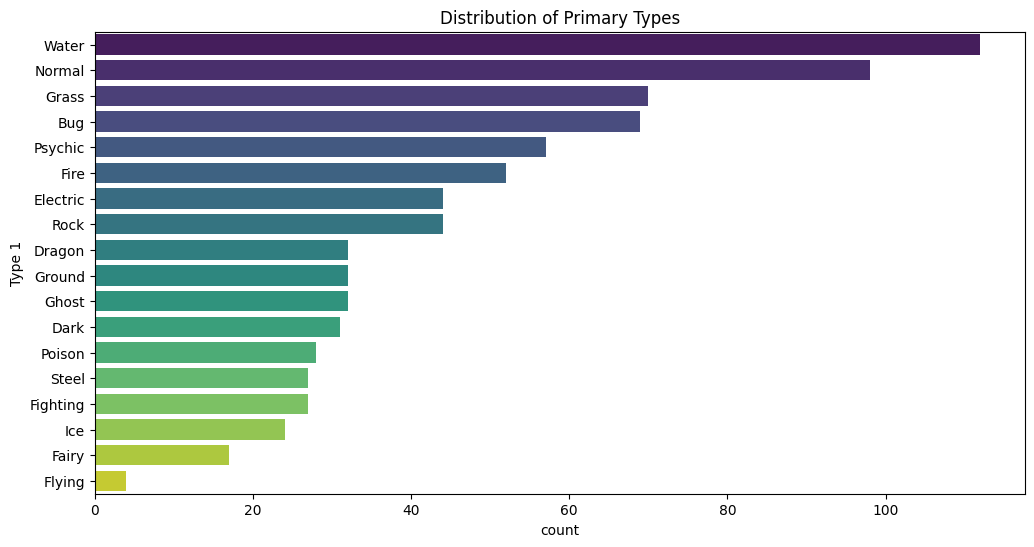

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/1653478977.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type 2', data=data, order=data['Type 2'].value_counts().index, palette='plasma')


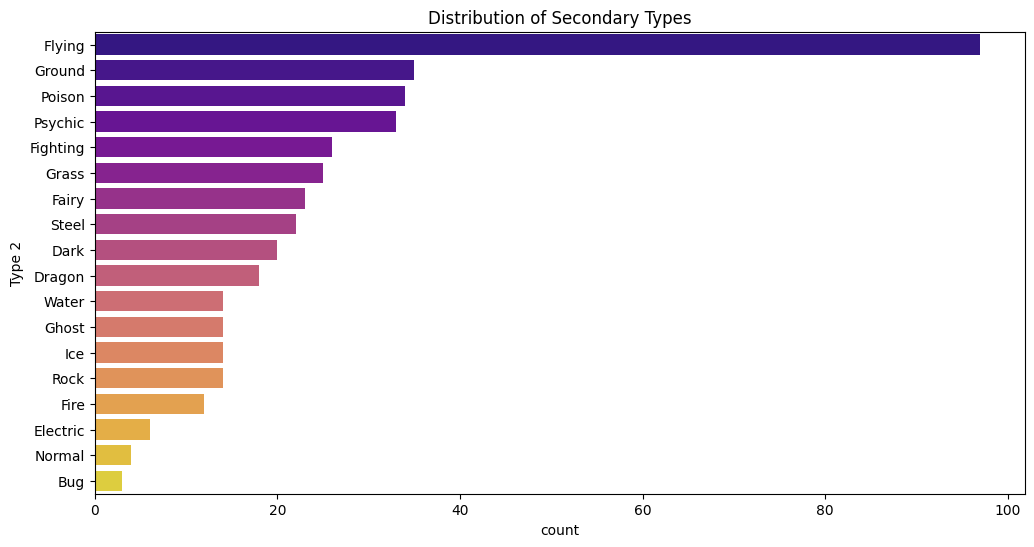

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Type 1
plt.figure(figsize=(12, 6))
sns.countplot(y='Type 1', data=data, order=data['Type 1'].value_counts().index, palette='viridis')
plt.title('Distribution of Primary Types')
plt.show()

# Countplot for Type 2
plt.figure(figsize=(12, 6))
sns.countplot(y='Type 2', data=data, order=data['Type 2'].value_counts().index, palette='plasma')
plt.title('Distribution of Secondary Types')
plt.show()

b. Statistical Summary

Compute descriptive statistics for numerical fields.

In [30]:
# Summary statistics
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000


c. Correlation Heatmap

Identify correlations between stats.

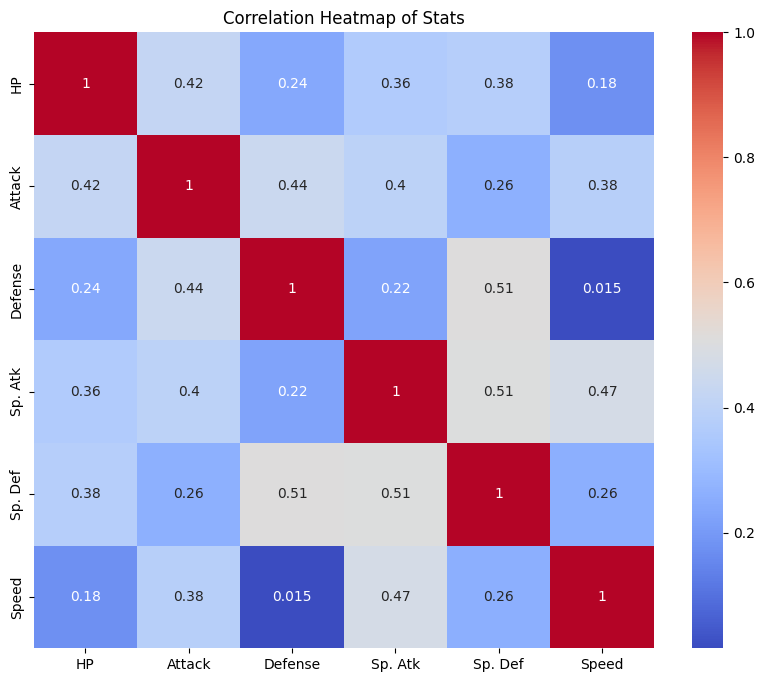

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stats')
plt.show()

4. Legendary vs Non-Legendary Comparison

Analyze differences in stats between Legendary and non-Legendary Pokémon


/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2575334974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')


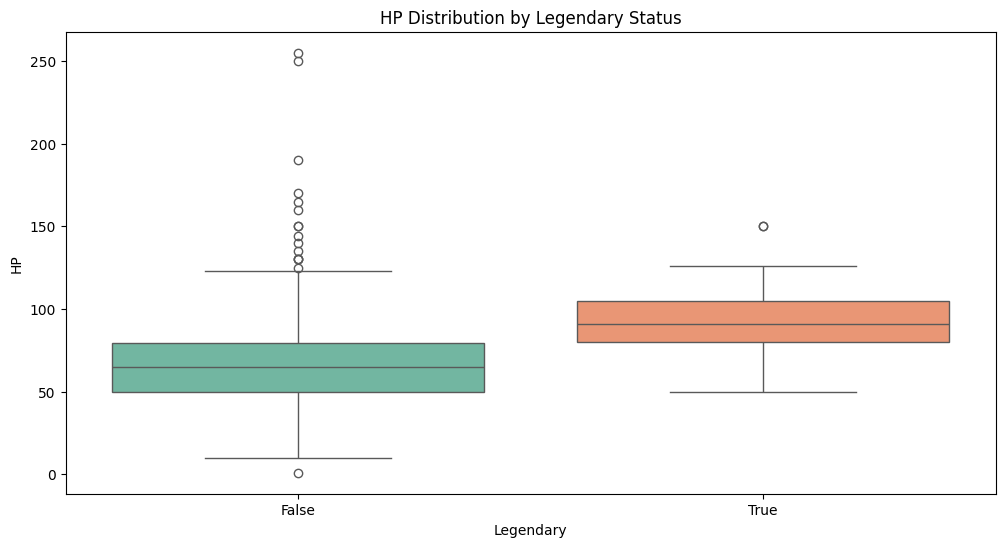

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2575334974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')


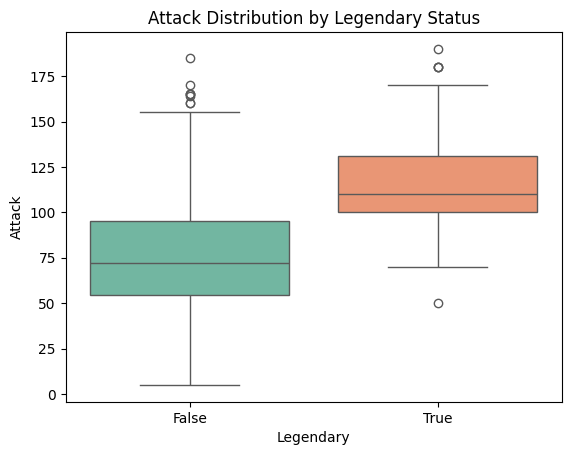

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2575334974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')


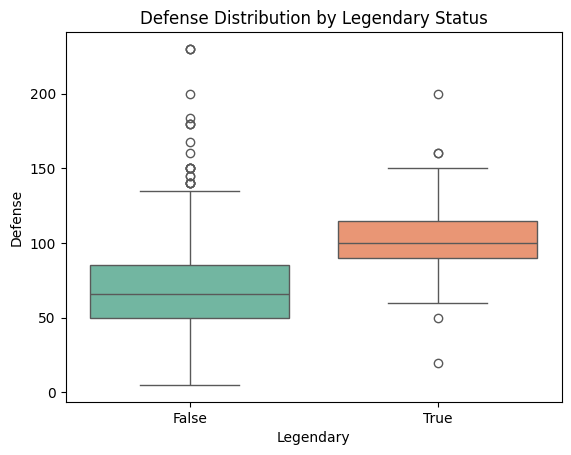

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2575334974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')


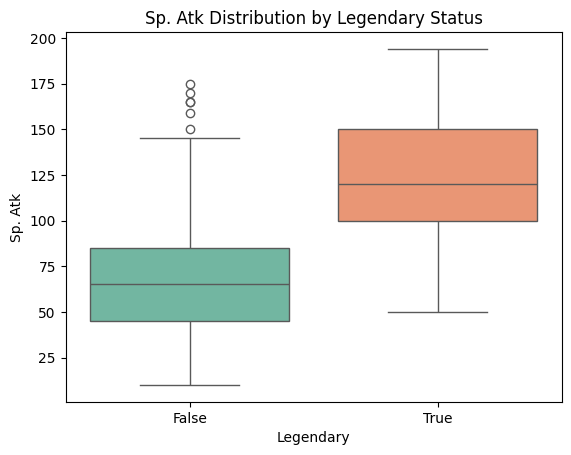

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2575334974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')


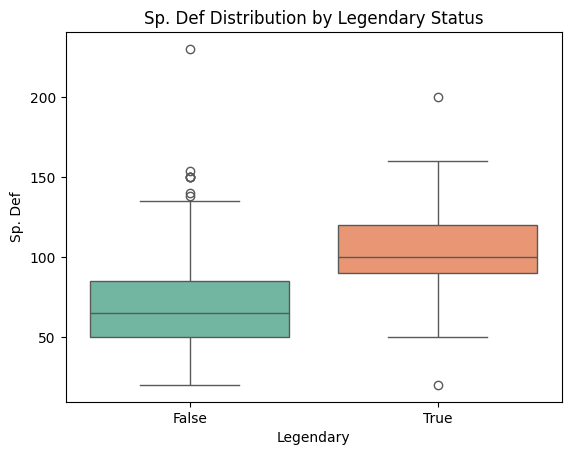

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2575334974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')


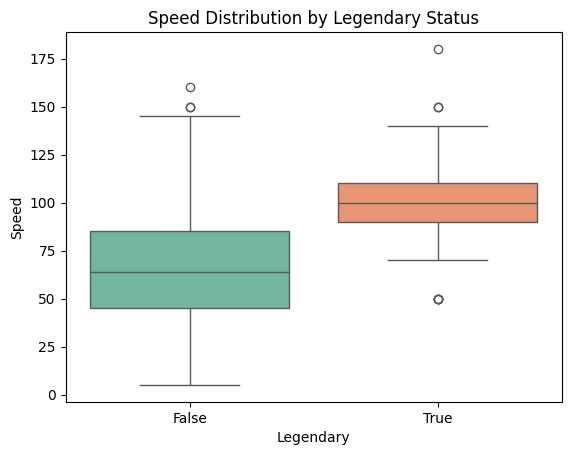

In [17]:
# Boxplot for stats comparison
plt.figure(figsize=(12, 6))
for stat in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    sns.boxplot(x='Legendary', y=stat, data=data, palette='Set2')
    plt.title(f'{stat} Distribution by Legendary Status')
    plt.show()

5. Generation Trends

Visualize how stats and counts vary across generations.


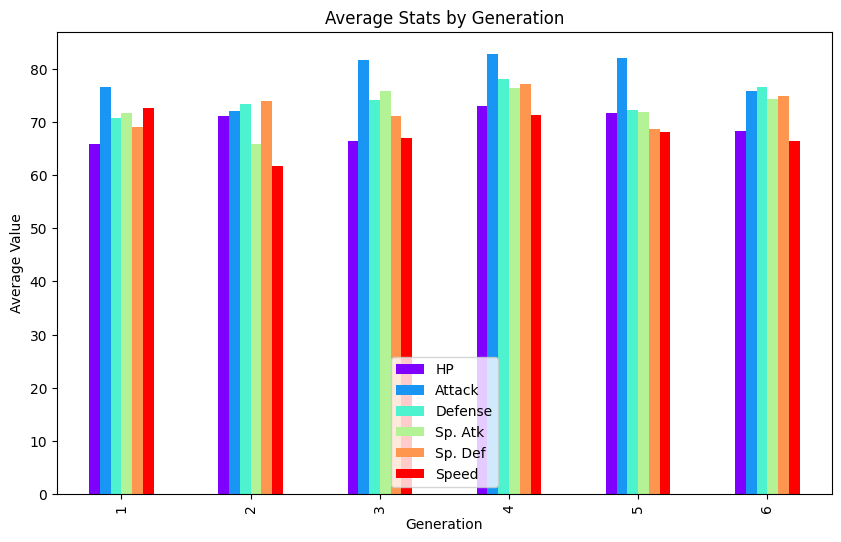

/var/folders/_r/_zh67rmx3t9g6lrcny8nn72h0000gn/T/ipykernel_41488/2375425781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Generation', data=data, palette='muted')


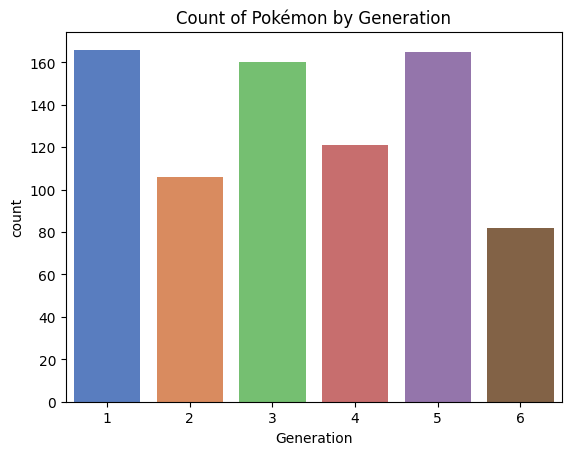

In [18]:
# Average stats by generation
stats_by_gen = data.groupby('Generation')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
stats_by_gen.plot(kind='bar', figsize=(10, 6), colormap='rainbow')
plt.title('Average Stats by Generation')
plt.ylabel('Average Value')
plt.show()

# Count of Pokémon by generation
sns.countplot(x='Generation', data=data, palette='muted')
plt.title('Count of Pokémon by Generation')
plt.show()

6. Top Performers

Identify the top 10 Pokémon based on total stats.


In [33]:
# Add a Total column
data['Total'] = data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Top 10 Pokémon by Total stats
top_10 = data.nlargest(10, 'Total')[['Name', 'Type 1', 'Type 2', 'Total']]
print(top_10)

                        Name   Type 1    Type 2  Total
163      MewtwoMega Mewtwo X  Psychic  Fighting    780
164      MewtwoMega Mewtwo Y  Psychic      None    780
426    RayquazaMega Rayquaza   Dragon    Flying    780
422      KyogrePrimal Kyogre    Water      None    770
424    GroudonPrimal Groudon   Ground      Fire    770
552                   Arceus   Normal      None    720
268  TyranitarMega Tyranitar     Rock      Dark    700
409  SalamenceMega Salamence   Dragon    Flying    700
413  MetagrossMega Metagross    Steel   Psychic    700
418        LatiasMega Latias   Dragon   Psychic    700


7. Type Effectiveness

Explore the average stats for each type.

                 HP      Attack     Defense    Sp. Atk    Sp. Def       Speed
Type 1                                                                       
Bug       56.884058   70.971014   70.724638  53.869565  64.797101   61.681159
Dark      66.806452   88.387097   70.225806  74.645161  69.516129   76.161290
Dragon    83.312500  112.125000   86.375000  96.843750  88.843750   83.031250
Electric  59.795455   69.090909   66.295455  90.022727  73.704545   84.500000
Fairy     74.117647   61.529412   65.705882  78.529412  84.705882   48.588235
Fighting  69.851852   96.777778   65.925926  53.111111  64.703704   66.074074
Fire      69.903846   84.769231   67.769231  88.980769  72.211538   74.442308
Flying    70.750000   78.750000   66.250000  94.250000  72.500000  102.500000
Ghost     64.437500   73.781250   81.187500  79.343750  76.468750   64.343750
Grass     67.271429   73.214286   70.800000  77.500000  70.428571   61.928571
Ground    73.781250   95.750000   84.843750  56.468750  62.75000

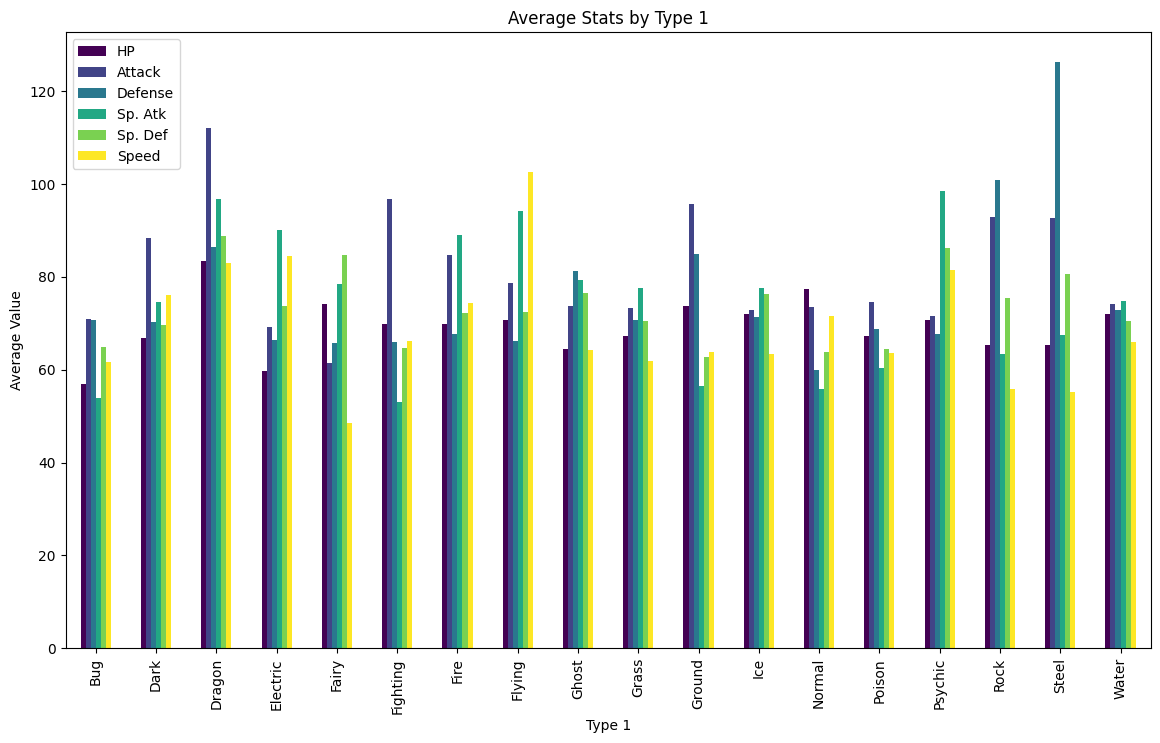

In [20]:
# Average stats by Type 1
avg_stats_by_type = data.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
print(avg_stats_by_type)

# Visualize
avg_stats_by_type.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Average Stats by Type 1')
plt.ylabel('Average Value')
plt.show()